In [3]:
import geopandas as gpd
import xarray as xr

# Get basin names of each glacier from centreline attribute table
glaciers = gpd.read_file("../data/misc/centreline_lines.geojson").glacier.unique()

# Load discharge data, subset by glaciers, and write to disk
discharge_ds = xr.open_dataset("../data/discharge/discharge_gate.nc", engine="h5netcdf").load()
discharge_ds = discharge_ds.where(discharge_ds.name_Mouginot.isin(glaciers), drop=True)
discharge_ds.to_netcdf("../data/discharge/discharge_monthly_1986_2024.nc")
discharge_ds

<xarray.Dataset> Size: 92kB
Dimensions:        (gate: 2, time: 2863)
Coordinates:
  * time           (time) datetime64[ns] 23kB 1986-04-15 ... 2024-04-15
  * gate           (gate) int64 16B 136 207
Data variables: (12/14)
    discharge      (gate, time) float32 23kB 9.456 9.439 9.831 ... 4.519 4.397
    err            (gate, time) float32 23kB 0.615 0.6146 ... 0.4196 0.4085
    coverage       (gate, time) float32 23kB 0.0 0.9748 1.0 ... 0.6457 0.7885
    mean_x         (gate) float64 16B 5.551e+05 4.863e+05
    mean_y         (gate) float64 16B -1.899e+06 -2.425e+06
    mean_lon       (gate) float32 8B -28.7 -33.66
    ...             ...
    region         (gate) object 16B 'CE' 'CE'
    Zwally_2012    (gate) float64 16B 31.0 33.0
    name_Bjørk     (gate) object 16B 'Daugaard-Jensen Gletsjer' 'K.J.V. Steen...
    name_Mouginot  (gate) object 16B 'DAUGAARD-JENSEN' 'UNNAMED_UUNARTIT_ISLA...
    ID_Moon        (gate) float64 16B 120.0 161.0
    ID_Moon_dist   (gate) float64 16B 3.418e+03 6.398e+03
Attributes:
    featureType:      timeSeries
    title:            Greenland discharge
    summary:          Greenland discharge per gate
    keywords:         Greenland; Ice Discharge; Calving; Submarine Melt
    source:           git commit: 0990889
    creator_name:     Ken Mankoff
    creator_email:    kdm@geus.dk
    creator_url:      http://kenmankoff.com
    institution:      GEUS
    references:       10.22008/promice/ice_discharge
    product_version:  2.0

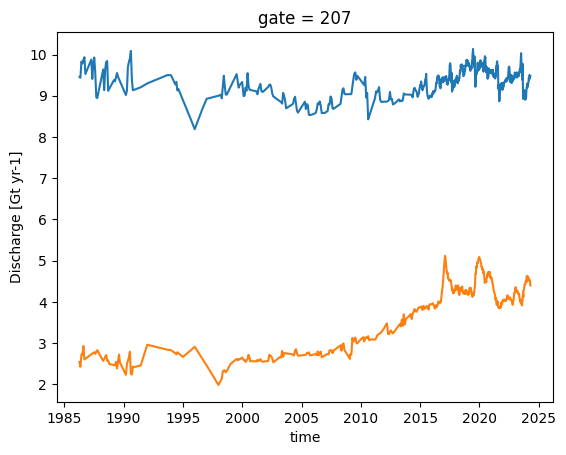

In [4]:
for _, ds in discharge_ds.groupby("gate", squeeze=False):
    ds.discharge.plot(label=ds.name_Mouginot)